In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(299,300)]
i =0
result = np.zeros((62,601))

In [3]:
#data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0298-09.UVEL.nc')
#plotvar = data.variables['UVEL'][0,:,:]
#lont = data.variables['ULONG']
#latt = data.variables['ULAT']

In [5]:
for yy in years:
    for mm in months:
        #data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.aice.nc')
        #cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0323-09.aice.nc
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.UVEL.nc')
        plotvar = data.variables['UVEL'][0,:,:,1130]
        lont = data.variables['ULONG'][:,1130]
        latt = data.variables['ULAT'][:,1130]
        #lont = lont[248:344,700:1400]
        #latt = latt[248:344,700:1400]
        plotvar = plotvar[:,:]
#       lont = lont[180:320,500:1200]
#        latt = latt[180:320,500:1200]
#        plotvar = plotvar[180:320,500:1200]
        aveplot = plotvar
        
        result = aveplot
        
        i = i + 1

In [7]:
#re = np.mean(result,axis=0)
re = result

In [8]:
re[re > 50] = np.nan

In [9]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/depth.nc')
A = data1.variables['z_t'][:]/100

In [10]:
data2=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0299-09.PD.nc')
PD = data2.variables['PD'][0,:,:]

In [11]:
PD = PD[:,270:370,1230]
PD = (PD-1)*1000

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/numpy/ma/core.py:1021: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [12]:
PD.max()

27.809261

In [44]:
#A = np.arange(62)
#B = np.arange(80)
B= latt
xx, yy = np.meshgrid(B, A)
###############################################################
my_font = {'fontname':'Cambria', 'size':'45'}
nice_cmap=plt.get_cmap('coolwarm')
lev_cmap = nice_cmap([1,30,50,70,100,130,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"coolwarm")
nice_levels = [-8,-6,-4,-2,0,2,4,6]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

#[27.77,27.776,27.778,27.78,27.782,27.786,27.787],

In [45]:
B.shape

(601,)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'spacing'
  after removing the cwd from sys.path.


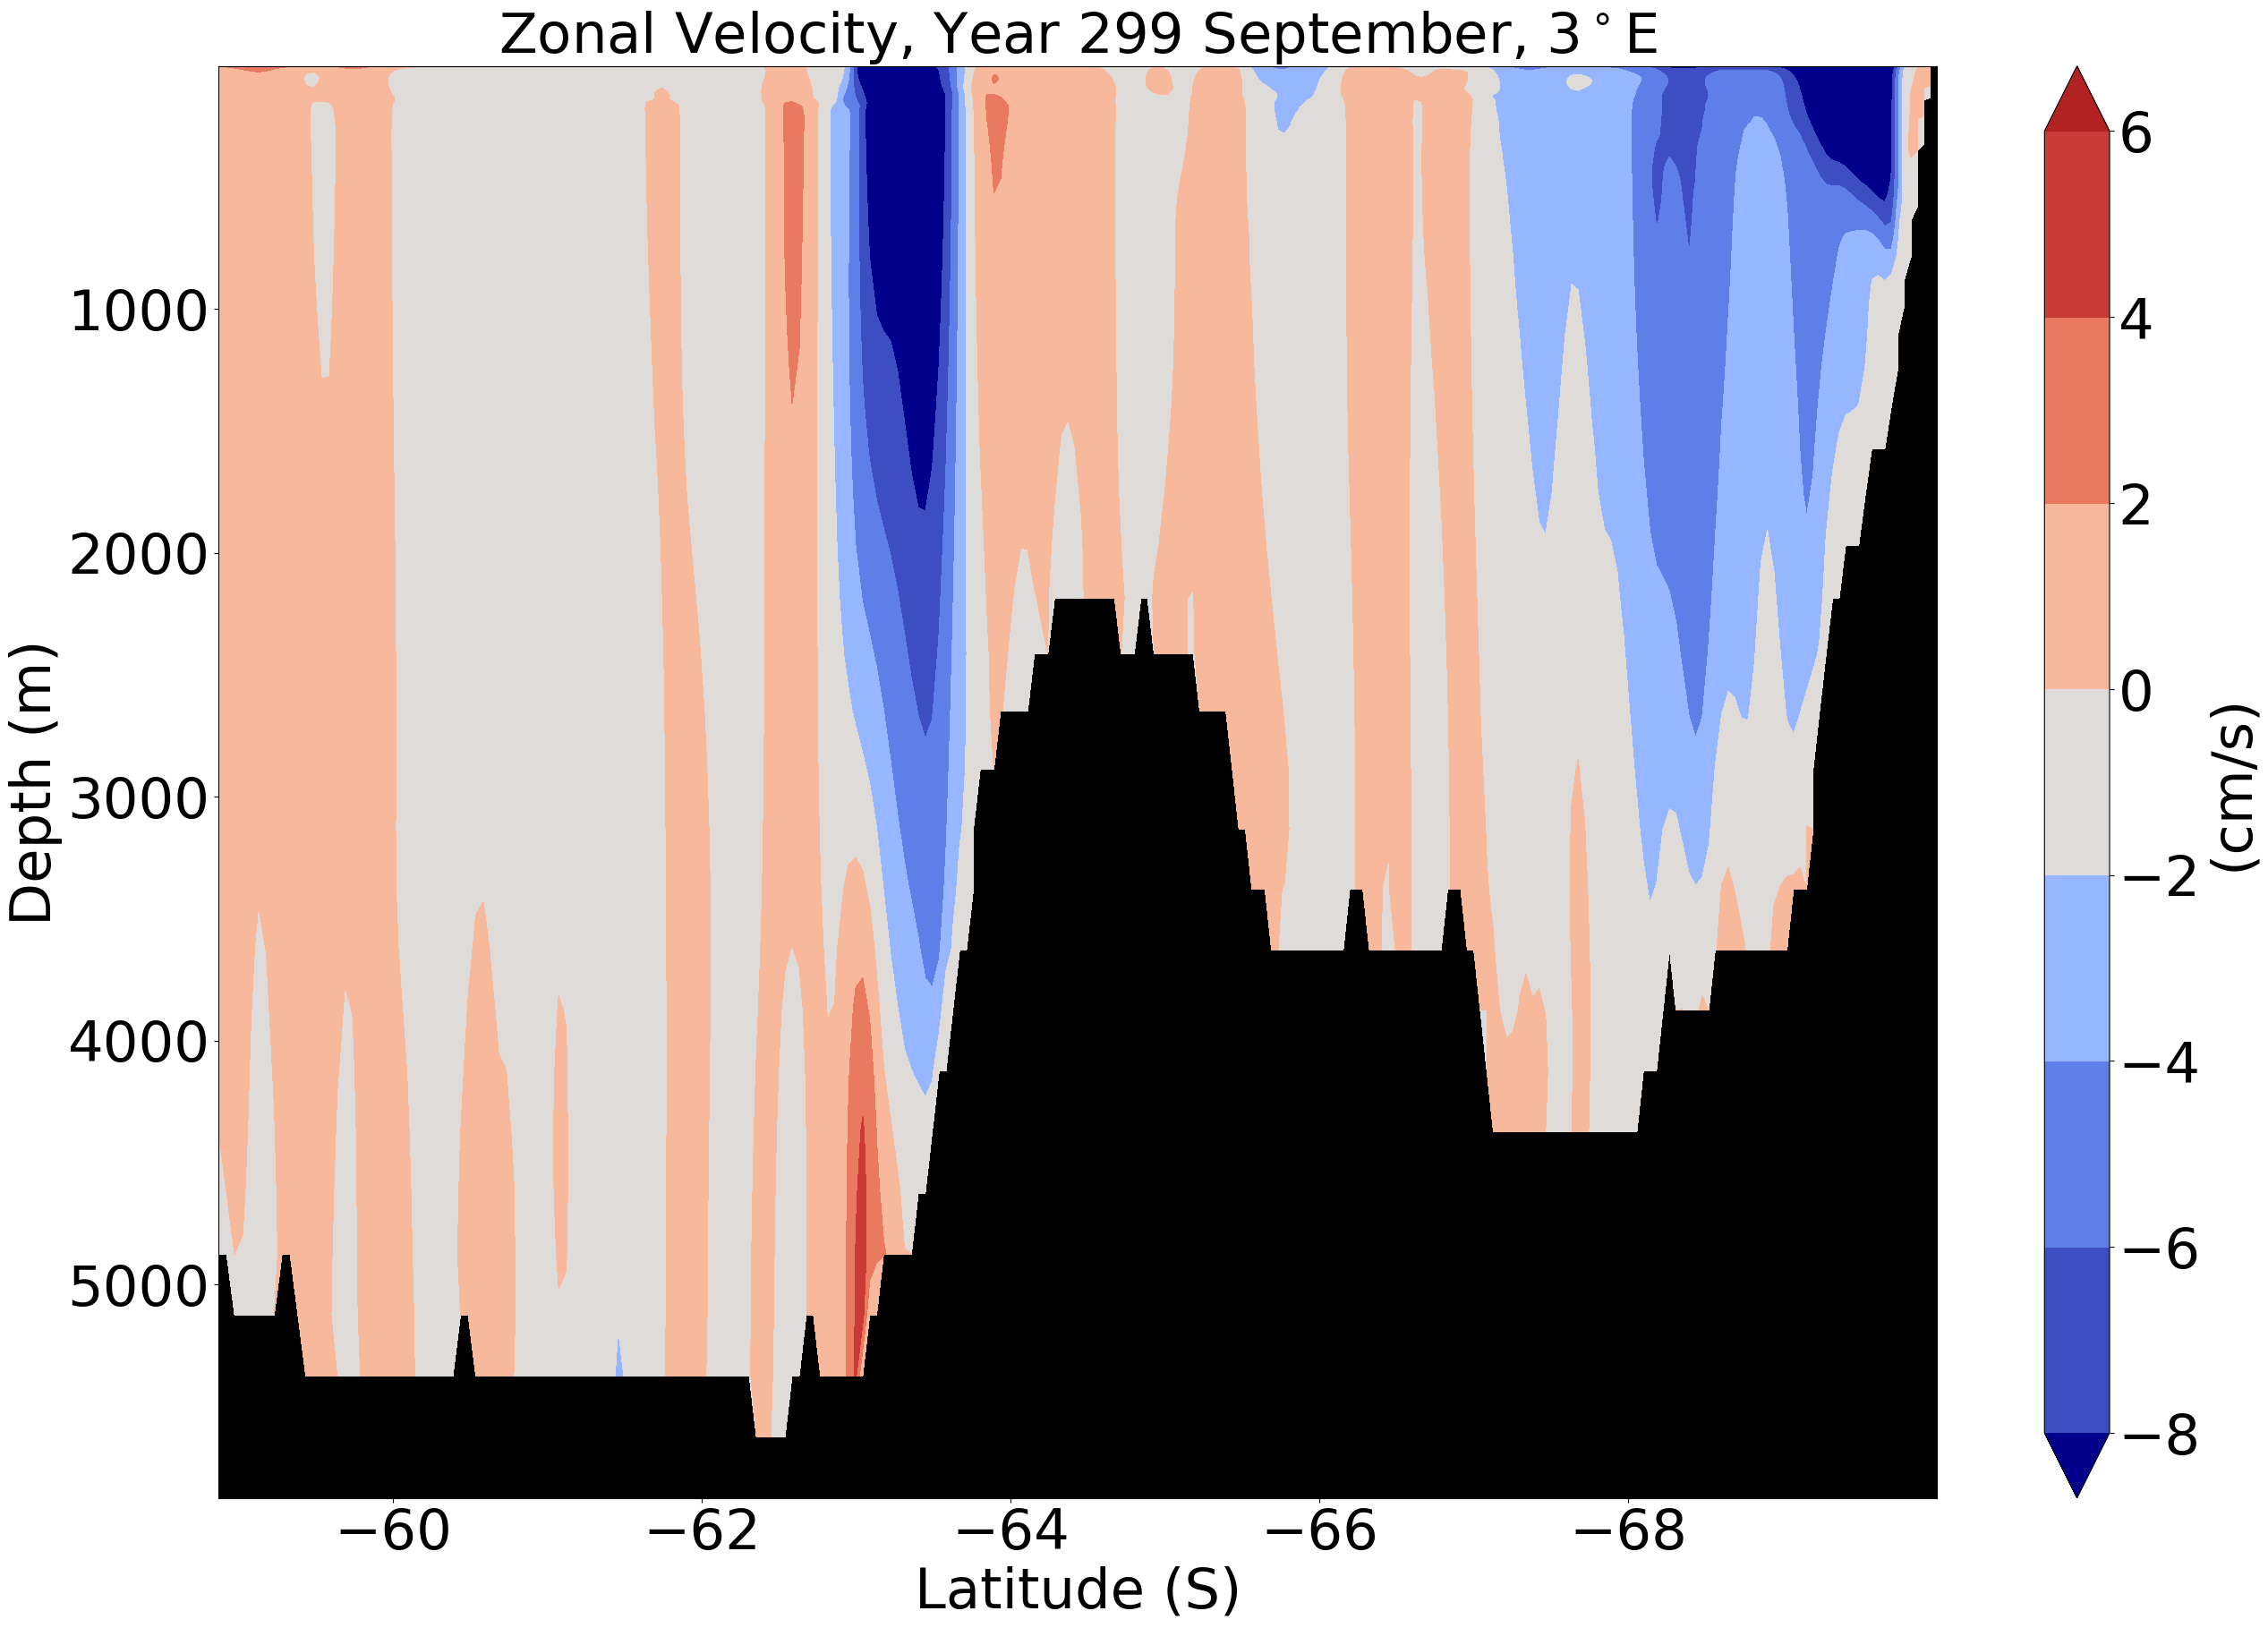

In [49]:
# plot the result
fig = plt.figure(figsize=(30,20), dpi=100)
ax0 = fig.add_axes([0.2, 0.1, 0.8, 0.8])
im = ax0.contourf(xx[:,200:450], yy[:,200:450], re[:,200:450],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
ax0.set_facecolor("black")
#ax0.imshow(np.where(plotvar.mask)[0],np.where(plotvar.mask)[1])
#CS = ax0.contour(xx[:45,:], yy[:45,:], PD[:45,:],colors = 'black', linestyles = 'solid',linewidths=3)
#plt.clabel(CS,fontsize=20)
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels,spacing='uniform')
cbar.ax.tick_params(labelsize=45)
cbar.set_label('(cm/s)', **my_font)
ax0.set_title('Mixed Layer Depth')
#############################################################################
plt.xticks(**my_font)
plt.yticks(**my_font)
ax0.invert_xaxis()
plt.xlabel('Latitude (S)',**my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
ax0.set_title('Zonal Velocity, Year 299 September, 3$^\circ$E',**my_font)
plt.savefig("290-2.png",bbox_inches='tight',dpi=fig.dpi)

In [51]:
np.savetxt('ridgevelocity.out', re)
np.savetxt('ridgevelocityxx.out', xx)
np.savetxt('ridgevelocityyy.out', yy)